In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
abu_kaahfa_data = [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
wassi_data = [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]
zarar_data = [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
hafiz_arshad_data = [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
javed_data = [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
abu_shoaib_data = [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
abu_umer_data = [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
abdul_rehman_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
fahadullah_data = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
baba_imran_data = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nasir_data = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ismail_khan_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
ajmal_amir_kasab_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [ ]:
# Merge individual lists into an adjacency matrix
adjacency_matrix = [
    abu_kaahfa_data,
    wassi_data,
    zarar_data,
    hafiz_arshad_data,
    javed_data,
    abu_shoaib_data,
    abu_umer_data,
    abdul_rehman_data,
    fahadullah_data,
    baba_imran_data,
    nasir_data,
    ismail_khan_data,
    ajmal_amir_kasab_data
]

# List of node names
node_names = [
    "Abu Kaahfa", "Wassi", "Zarar", "Hafiz Arshad", "Javed", "Abu Shoaib", "Abu Umer",
    "Abdul Rehman", "Fahadullah", "Baba Imran", "Nasir", "Ismail Khan", "Ajmal Amir Kasab"
]


In [ ]:
G = nx.DiGraph()

In [ ]:

# Add nodes
for i, name in enumerate(node_names):
    G.add_node(i, label=name)

# Add edges based on the adjacency matrix
for i in range(len(adjacency_matrix)):
    for j in range(len(adjacency_matrix[i])):
        if adjacency_matrix[i][j] == 1:
            G.add_edge(i, j)

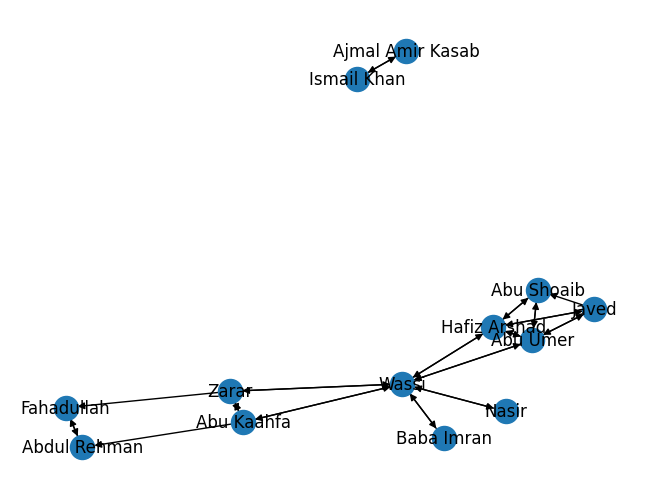

In [ ]:
# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
plt.show()

In [ ]:
groups = {
    "Group I": ["Wassi", "Ismail Khan", "Javed", "Zarar"],
    "Group II": ["Abu Shoaib", "Abu Umer", "Fahadullah", "Ajmal Amir Kasab"],
    "Group III": ["Baba Imran", "Abdul Rehman", "Hafiz Arshad", "Abu Kaahfa"]
}

In [ ]:
group_mapping = {}
for group, members in groups.items():
    for member in members:
        for node_index, node_label in G.nodes(data='label'):
            if node_label == member:
                group_mapping[node_index] = group

# Identify the node not belonging to any group
for node_index, node_label in G.nodes(data='label'):
    if node_index not in group_mapping:
        group_mapping[node_index] = "No Group"

In [ ]:
print(group_mapping)


{1: 'Group I', 11: 'Group I', 4: 'Group I', 2: 'Group I', 5: 'Group II', 6: 'Group II', 8: 'Group II', 12: 'Group II', 9: 'Group III', 7: 'Group III', 3: 'Group III', 0: 'Group III', 10: 'No Group'}


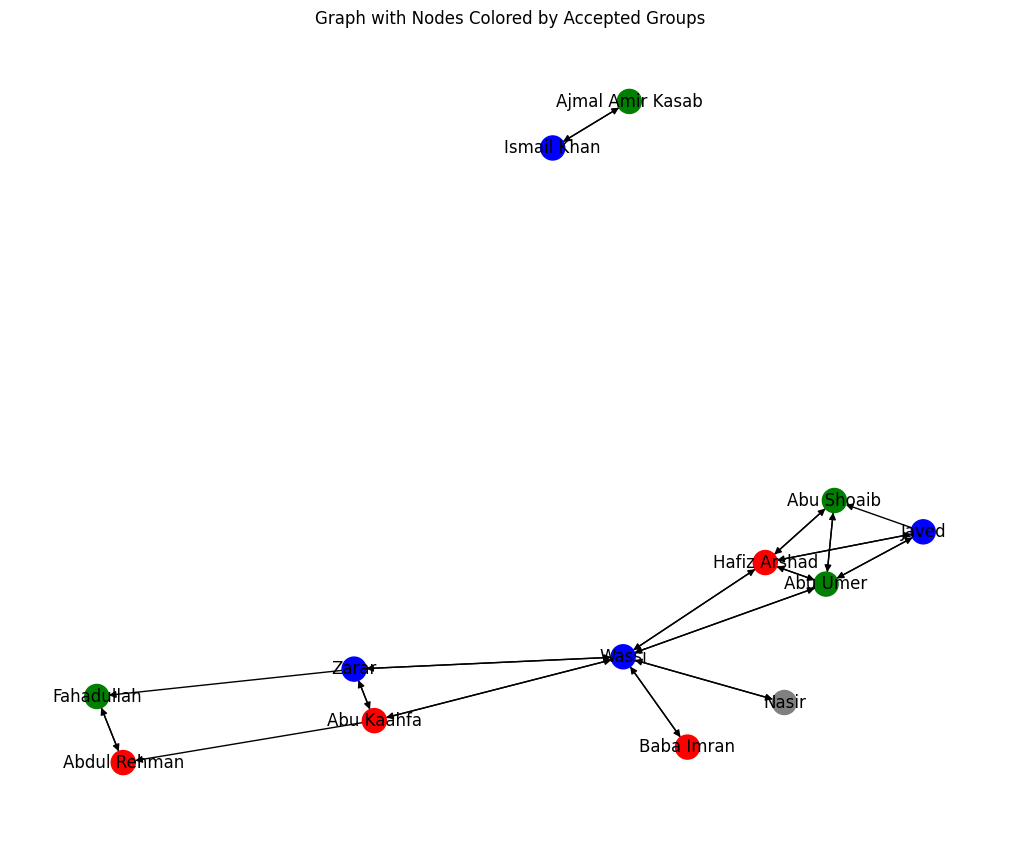

In [ ]:
groups = {
    "Group I": ["Wassi", "Ismail Khan", "Javed", "Zarar"],
    "Group II": ["Abu Shoaib", "Abu Umer", "Fahadullah", "Ajmal Amir Kasab"],
    "Group III": ["Baba Imran", "Abdul Rehman", "Hafiz Arshad", "Abu Kaahfa"]
}

# Define colors for each group
group_colors = {
    "Group I": "blue",
    "Group II": "green",
    "Group III": "red"
}

# Assign colors to nodes based on groups
node_colors = []
for i, name in enumerate(node_names):
    found_group = False
    for group, members in groups.items():
        if name in members:
            node_colors.append(group_colors[group])
            found_group = True
            break
    if not found_group:
        node_colors.append("gray")  # Assign a distinct color for nodes not in any group
plt.figure(figsize=(10, 8))
# Draw the graph with nodes colored by group
pos = nx.spring_layout(G, seed=42)  # Seed for reproducibility
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), arrows=True, node_color=node_colors)
plt.title('Graph with Nodes Colored by Accepted Groups')
plt.show()

In [ ]:
# Calculate betweenness centrality, closeness centrality, and PageRank
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Node Name': node_names,  # Add a column for node names
    'Betweenness Centrality': [betweenness[node] for node in G.nodes()],
    'Closeness Centrality': [closeness[node] for node in G.nodes()],
    'PageRank': [pagerank[node] for node in G.nodes()]
})

# Set the index of the DataFrame to node names
df.set_index('Node Name', inplace=True)


# Display the DataFrame
print(df)


                  Node  Betweenness Centrality  Closeness Centrality  PageRank
Node Name                                                                     
Abu Kaahfa           0                0.056818              0.333333  0.039753
Wassi                1                0.409091              0.533333  0.119652
Zarar                2                0.056818              0.333333  0.039753
Hafiz Arshad         3                0.094697              0.444444  0.087421
Javed                4                0.000000              0.296296  0.048693
Abu Shoaib           5                0.000000              0.313725  0.062489
Abu Umer             6                0.094697              0.444444  0.087421
Abdul Rehman         7                0.003788              0.320513  0.151997
Fahadullah           8                0.003788              0.320513  0.151997
Baba Imran           9                0.000000              0.313725  0.028489
Nasir               10                0.000000      

In [ ]:
node_name_map = {node: name for node, name in zip(range(len(node_names)), node_names)}
node_name_map

{0: 'Abu Kaahfa',
 1: 'Wassi',
 2: 'Zarar',
 3: 'Hafiz Arshad',
 4: 'Javed',
 5: 'Abu Shoaib',
 6: 'Abu Umer',
 7: 'Abdul Rehman',
 8: 'Fahadullah',
 9: 'Baba Imran',
 10: 'Nasir',
 11: 'Ismail Khan',
 12: 'Ajmal Amir Kasab'}

In [ ]:
def fitness_function(chromosome):
    # Calculate fitness using TN(x) = BT * 5 + PR * 3 + CL
    bt = sum([betweenness[node] for node in chromosome])
    pr = sum([pagerank[node] for node in chromosome])
    cl = sum([closeness[node] for node in chromosome])
    return (bt * 5)**2 + pr * 3 + cl

In [ ]:
def fitness_function_n(node):
    # Calculate fitness using TN(x) = BT * 5 + PR * 3 + CL
    bt = betweenness[node]
    pr = pagerank[node]
    cl = closeness[node]
    return (bt * 5)**2 + pr * 3 + cl

In [ ]:
print(fitness_function_n(11),fitness_function_n(6))

0.3141025641025641 0.9308963234025018


In [ ]:

# Calculate the degree of each node
degree = dict(G.degree())

# Create a DataFrame to display the degrees
df_degree = pd.DataFrame({
    'Node': list(degree.keys()),
    'Degree': list(degree.values())
})

# Print the DataFrame
print(df_degree)

    Node  Degree
0      0       5
1      1      12
2      2       5
3      3       8
4      4       5
5      5       5
6      6       8
7      7       3
8      8       3
9      9       2
10    10       2
11    11       2
12    12       2


In [ ]:
sum_d=0
for d in degree.values():
  sum_d+=d
avg_d=sum_d/len(degree.values())
print(avg_d)
AvgD= avg_d

4.769230769230769


Decreasing order

In [ ]:
df_degree_sorted = df_degree.sort_values(by='Degree', ascending=False)

# Print the sorted DataFrame
print(df_degree_sorted)

    Node  Degree
1      1      12
3      3       8
6      6       8
0      0       5
2      2       5
4      4       5
5      5       5
7      7       3
8      8       3
9      9       2
10    10       2
11    11       2
12    12       2


In [ ]:
# Initialize list to store accepted groups of nodes
accepted_groups = []

# Iterate over nodes in groups of 4
for i in range(0, len(df_degree_sorted), 4):
    group = df_degree_sorted.iloc[i:i+4]
    avg_group_degree = group['Degree'].mean()
    if avg_group_degree >= abs(AvgD/2):
        accepted_groups.append(group['Node'].tolist())

# Print accepted groups
group_d={}
print("Accepted groups of nodes:")
for group in accepted_groups:
    print(group)



Accepted groups of nodes:
[1, 3, 6, 0]
[2, 4, 5, 7]


In [ ]:


# Initialize an empty dictionary to store average degree centrality and elements of each group
group_data = {'Group': [], 'Elements': [], 'Average Degree Centrality': []}

# Iterate over accepted groups
for i, group in enumerate(accepted_groups):
    # Convert node indices to names
    group_names = [node_names[node] for node in group]

    # Calculate the average degree centrality for the current group
    avg_group_degree = df_degree.loc[group]['Degree'].mean()

    # Store the average degree centrality and elements of the current group in the dictionary
    group_data['Group'].append(f'Group {i+1}')
    group_data['Average Degree Centrality'].append(avg_group_degree)
    group_data['Elements'].append(', '.join(group_names))

# Create a DataFrame from the dictionary
group_avg_degree_df = pd.DataFrame(group_data)

# Print the DataFrame
print("DataFrame showing the average degree centrality and elements of each group:")
print(group_avg_degree_df)


DataFrame showing the average degree centrality and elements of each group:
     Group                                   Elements  \
0  Group 1  Wassi, Hafiz Arshad, Abu Umer, Abu Kaahfa   
1  Group 2     Zarar, Javed, Abu Shoaib, Abdul Rehman   

   Average Degree Centrality  
0                       8.25  
1                       4.50  


In [ ]:
# Create a new graph containing only the accepted nodes and their edges
accepted_graph = nx.DiGraph()
for group in accepted_groups:
    accepted_graph.add_nodes_from(group)
    for node in group:
        accepted_graph.add_edges_from(G.edges(node))

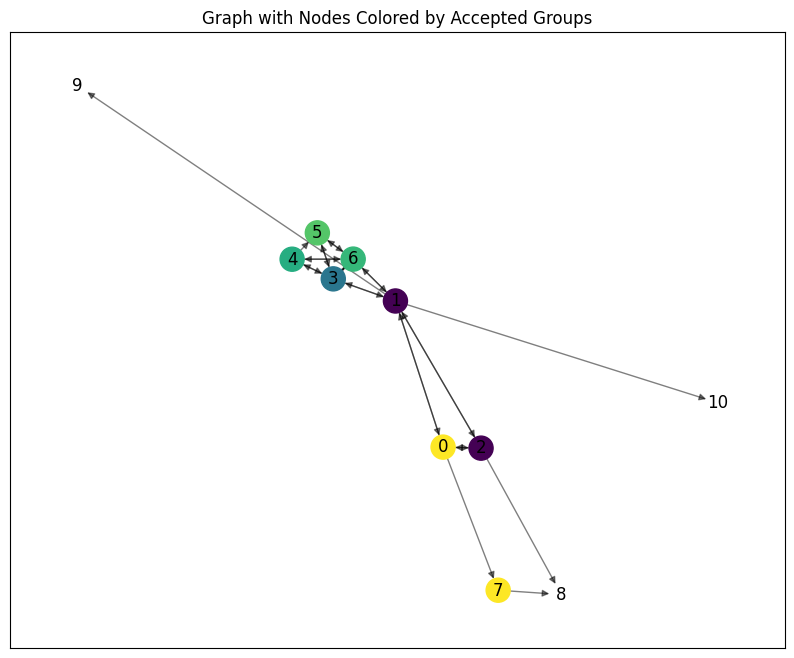

In [ ]:
# Draw the graph with different colors for each group
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(accepted_graph, seed=42)  # Seed for reproducibility
colors = iter(plt.cm.tab20(np.linspace(0, 1, len(accepted_groups))))  # Choose color map

for group in accepted_groups:
    nx.draw_networkx_nodes(accepted_graph, pos, nodelist=group, node_color=next(colors), label="Group {}".format(accepted_groups.index(group) + 1))
nx.draw_networkx_edges(accepted_graph, pos, alpha=0.5)
nx.draw_networkx_labels(accepted_graph, pos)
plt.title('Graph with Nodes Colored by Accepted Groups')
plt.show()

In [ ]:
node_name_map = {node: name for node, name in zip(range(len(node_names)), node_names)}
node_name_map

{0: 'Abu Kaahfa',
 1: 'Wassi',
 2: 'Zarar',
 3: 'Hafiz Arshad',
 4: 'Javed',
 5: 'Abu Shoaib',
 6: 'Abu Umer',
 7: 'Abdul Rehman',
 8: 'Fahadullah',
 9: 'Baba Imran',
 10: 'Nasir',
 11: 'Ismail Khan',
 12: 'Ajmal Amir Kasab'}

In [ ]:
df_degree_sorted = df_degree.sort_values(by='Degree', ascending=False)

# Print the sorted DataFrame
print(df_degree_sorted,node_name_map)

    Node  Degree
1      1      12
3      3       8
6      6       8
0      0       5
2      2       5
4      4       5
5      5       5
7      7       3
8      8       3
9      9       2
10    10       2
11    11       2
12    12       2 {0: 'Abu Kaahfa', 1: 'Wassi', 2: 'Zarar', 3: 'Hafiz Arshad', 4: 'Javed', 5: 'Abu Shoaib', 6: 'Abu Umer', 7: 'Abdul Rehman', 8: 'Fahadullah', 9: 'Baba Imran', 10: 'Nasir', 11: 'Ismail Khan', 12: 'Ajmal Amir Kasab'}


KeyError: 11

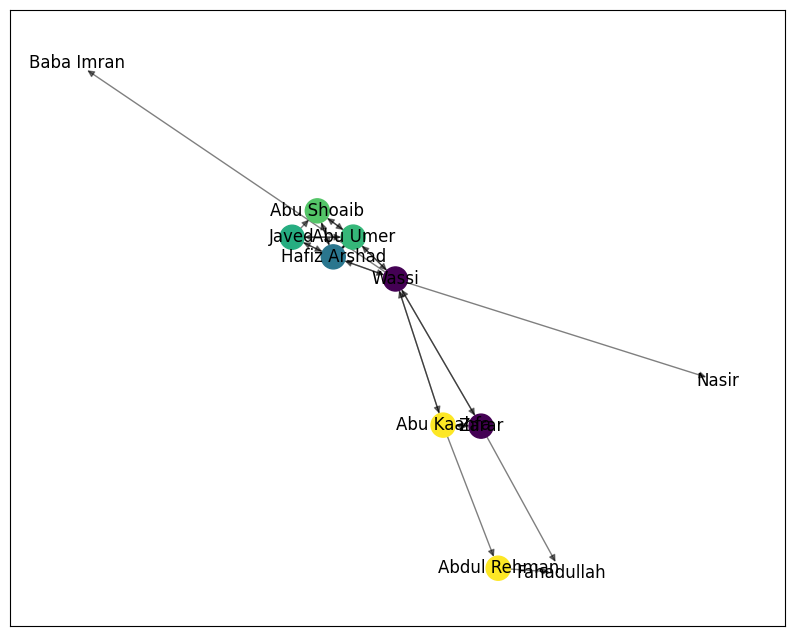

In [ ]:
# Draw the graph with different colors for each group and node names
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(accepted_graph, seed=42)  # Seed for reproducibility
colors = iter(plt.cm.tab20(np.linspace(0, 1, len(accepted_groups))))  # Choose color map

for group in accepted_groups:
    nx.draw_networkx_nodes(accepted_graph, pos, nodelist=group, node_color=next(colors), label="Group {}".format(accepted_groups.index(group) + 1))
nx.draw_networkx_edges(accepted_graph, pos, alpha=0.5)
nx.draw_networkx_labels(accepted_graph, pos, labels=node_name_map)  # Use node_name_map to display node names
plt.title('Graph with Nodes Colored by Accepted Groups')

plt.show()


In [ ]:
# Define termination condition function
def termination_condition_met(best_fitness_history, num_generations_no_improvement):
    """
    Check if the termination condition is met.
    """
    # Check if there has been no improvement in fitness over the last num_generations_no_improvement generations
    if len(best_fitness_history) > num_generations_no_improvement:
        return all(best_fitness_history[-1] <= fitness for fitness in best_fitness_history[-num_generations_no_improvement:])
    else:
        return False

In [ ]:
import random
import copy
best_fit_history=[]
def crossover(parent1, parent2):
    """
    Perform crossover between two parents (groups of nodes).
    """
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    return child1, child2
def genetic_algorithm(node_groups, num_generations, mutation_rate):
    """
    Genetic algorithm to optimize node groups based on the described fitness function.
    """
    best_fitness = 0
    best_group = None
    best_fitness_history = []
    global best_fit_history
    for generation in range(num_generations):
        # Evaluate fitness for each group
        fitness_values = [fitness_function(group) for group in node_groups]

        # Find the best group in the current generation
        current_best_fitness = max(fitness_values)
        best_fit_history.append(current_best_fitness)

        current_best_group = node_groups[fitness_values.index(current_best_fitness)]
        print("current best :",current_best_group)
        # Check if the current best is better than the overall best
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_group = copy.deepcopy(current_best_group)
            best_fitness_history.append(best_fitness)

        else:
          break
        # Selection and Crossover
        for _ in range(len(node_groups) // 2):
            ind=random.randint(0,2)
            print(ind,(ind+1)%3)
            parent1 = node_groups[ind]
            parent2 = node_groups[(ind+1)%3]
            print(parent1,parent2)
            child1, child2 = crossover(parent1, parent2)
            print(child1,child2)

            if fitness_function(child1)>fitness_function(parent1) or fitness_function(child2)>fitness_function(parent2):
                node_groups[ind]=child1
                node_groups[(ind+1)%3]=child2
            print(node_groups)

    return best_group, best_fitness, best_fit_history

# Define num_generations_no_improvement
num_generations_no_improvement = 10  # Adjust this value as needed

def termination_condition_met(best_fitness_history, num_generations_no_improvement):
    """
    Check if the termination condition is met.
    """
    # Check if there has been no improvement in fitness over the last num_generations_no_improvement generations
    if len(best_fitness_history) > num_generations_no_improvement:
        return all(best_fitness_history[-1] <= fitness for fitness in best_fitness_history[-num_generations_no_improvement:])
    else:
        return False
print(accepted_groups)
best_group, best_fitness,best_fitness_history = genetic_algorithm(
    node_groups=accepted_groups,
    num_generations=10,
    mutation_rate=0.1
)

print("Best Group:", best_group)
print("Best Fitness:", best_fitness)
print("Best Fitness:", best_fitness_history)
print("Fitness of each node in the best group:")


[[6, 11, 1, 5], [8, 11, 0, 3], [10, 4, 7, 3]]
current best : [6, 11, 1, 5]
2 0
[10, 4, 7, 3] [6, 11, 1, 5]
[10, 4, 1, 5] [6, 11, 7, 3]
[[6, 11, 7, 3], [8, 11, 0, 3], [10, 4, 1, 5]]
current best : [8, 11, 0, 3]
Best Group: [6, 11, 1, 5]
Best Fitness: 41.78365662648066
Best Fitness: [41.78365662648066, 39.87626543585654]
Fitness of each node in the best group:


2.4935341641652777
6.741604962126366
6.083131510734442
1.031445862188487


<BarContainer object of 4 artists>

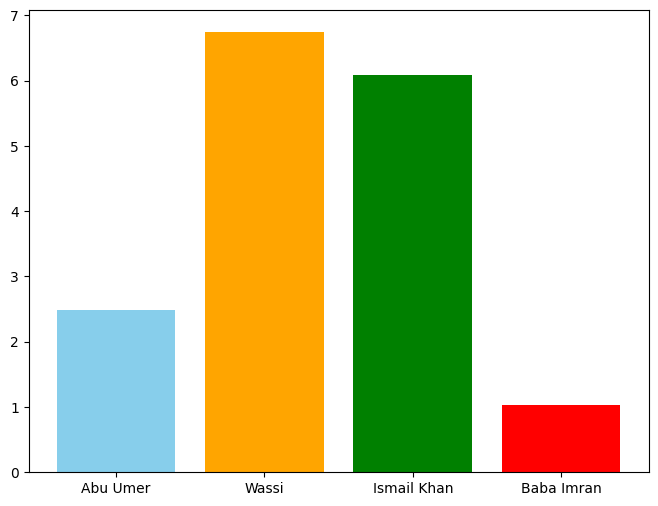

In [ ]:
vals=[]
for i in best_group:
  print(fitness_function_n(i))
  vals.append(fitness_function_n(i))
ke=[node_name_map[i] for i in best_group]
colors = ['skyblue', 'orange', 'green', 'red']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(ke, vals, color=colors)

In [ ]:
def mutate(group1,group2):
    """
    Perform mutation on a group by swapping two random nodes.
    """
    # Ensure the group has at least two nodes for mutation

    # Randomly select two distinct indices within the group
    index=random.randint(0,3)
    print(group1,group2)
    # Swap the nodes at the selected indices
    group1[index], group2[index] = group2[index], group1[index]
    print(group1,group2)

    return group1,group2
def get_best_mutated_group(best_group, groups):
    """
    Mutate the best_group and evaluate its fitness against other groups.
    Return the mutated group with the highest fitness.
    """
    mutated_best_group = best_group[:]
    best_fitness = fitness_function(mutated_best_group)
    print(best_fitness,groups,best_group)
    for _ in range(1,3):  # You can adjust the number of mutation attempts
        print(best_fitness,groups,best_group)
        print(best_fitness,groups)
        mutated_group,other = mutate(best_group,groups[_])
        mutated_fitness = fitness_function(mutated_group)

        if mutated_fitness > best_fitness:
            print("Muted fit val > ",mutated_fitness)
            best_fitness = mutated_fitness
            mutated_best_group = mutated_group[:]
            print("Muted fit group > ",mutated_best_group)

    return mutated_best_group


mutated_best_group = get_best_mutated_group(best_group, accepted_groups)
print("Mutated Best Group:", mutated_best_group)
print("Fitness of Mutated Best Group:", fitness_function(mutated_best_group))

41.78365662648066 [[6, 11, 7, 3], [8, 11, 0, 3], [10, 4, 1, 5]] [6, 11, 1, 5]
41.78365662648066 [[6, 11, 7, 3], [8, 11, 0, 3], [10, 4, 1, 5]] [6, 11, 1, 5]
41.78365662648066 [[6, 11, 7, 3], [8, 11, 0, 3], [10, 4, 1, 5]]
[6, 11, 1, 5] [8, 11, 0, 3]
[6, 11, 1, 3] [8, 11, 0, 5]
Muted fit val >  47.384496113539655
Muted fit group >  [6, 11, 1, 3]
47.384496113539655 [[6, 11, 7, 3], [8, 11, 0, 5], [10, 4, 1, 5]] [6, 11, 1, 3]
47.384496113539655 [[6, 11, 7, 3], [8, 11, 0, 5], [10, 4, 1, 5]]
[6, 11, 1, 3] [10, 4, 1, 5]
[6, 11, 1, 5] [10, 4, 1, 3]
Mutated Best Group: [6, 11, 1, 3]
Fitness of Mutated Best Group: 47.384496113539655


2.4935341641652777
6.741604962126366
6.083131510734442
0.5126770822002138


<BarContainer object of 4 artists>

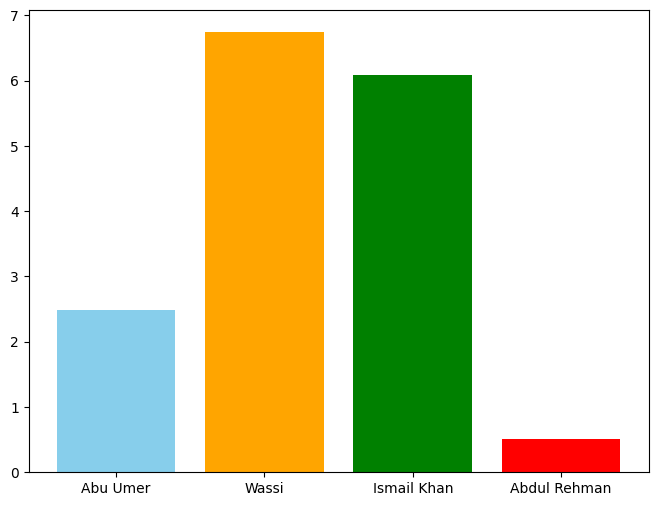

In [ ]:
vals=[]
for i in best_group:
  print(fitness_function_n(i))
  vals.append(fitness_function_n(i))
ke=[node_name_map[i] for i in best_group]
colors = ['skyblue', 'orange', 'green', 'red']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(ke, vals, color=colors)

6.741604962126366
2.4935341641652777
1.031445862188487
0.4596343290061256
25.117289106283323 18.611235067530885


{0: 'Ajmal Amir Kasab',
 1: 'Ismail Khan',
 2: 'Nasir',
 3: 'Baba Imran',
 4: 'Fahadullah',
 5: 'Abdul Rehman',
 6: 'Abu Umer',
 7: 'Abu Shoaib',
 8: 'Javed',
 9: 'Hafiz Arshad',
 10: 'Zarar',
 11: 'Wassi',
 12: 'Abu Kaahfa'}

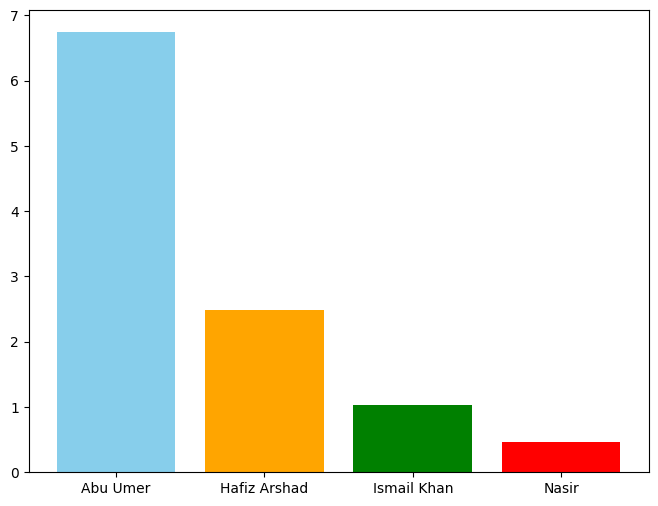

In [ ]:
# 9: 'Hafiz Arshad'

best_group2=[11, 6, 3, 9]

vals=[]
for i in best_group2:
  print(fitness_function_n(i))
  vals.append(fitness_function_n(i))
ke=[node_name_map[i] for i in best_group]
colors = ['skyblue', 'orange', 'green', 'red']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(ke, vals, color=colors)
print(fitness_function(best_group2),fitness_function(best_group))
node_name_map

In [ ]:
for i in best_group:
    print(f"Node {node_name_map[i]}: {fitness_function_n(node)}")

Node Abu Umer: 0.3175888744606711
Node Hafiz Arshad: 0.3175888744606711
Node Ismail Khan: 0.3175888744606711
Node Nasir: 0.3175888744606711


In [ ]:
for a in best_group:
  print(node_name_map[a])

Abu Umer
Hafiz Arshad
Ismail Khan
Nasir


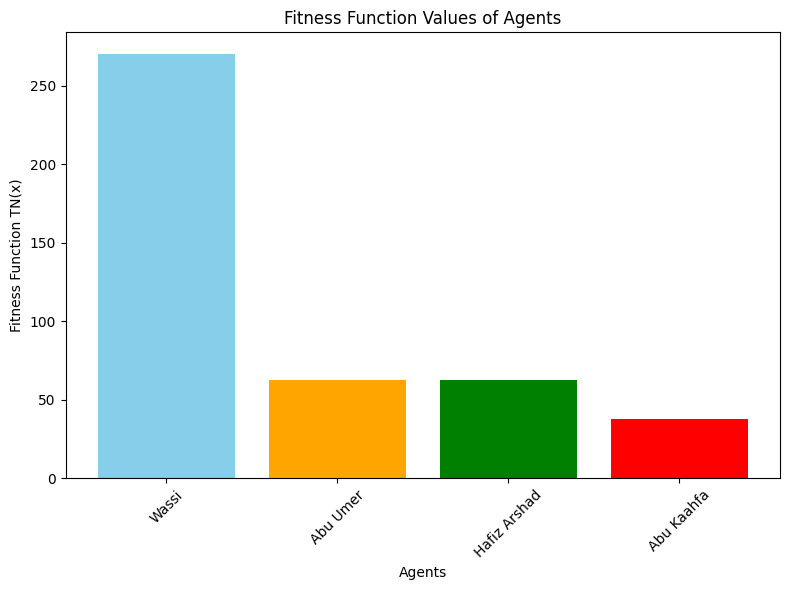

In [ ]:
import matplotlib.pyplot as plt

# Data
agents = ['Wassi', 'Abu Umer', 'Hafiz Arshad', 'Abu Kaahfa']
fitness_values = [270.61, 62.8559, 62.855, 37.767]
colors = ['skyblue', 'orange', 'green', 'red']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(agents, fitness_values, color=colors)
plt.xlabel('Agents')
plt.ylabel('Fitness Function TN(x)')
plt.title('Fitness Function Values of Agents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


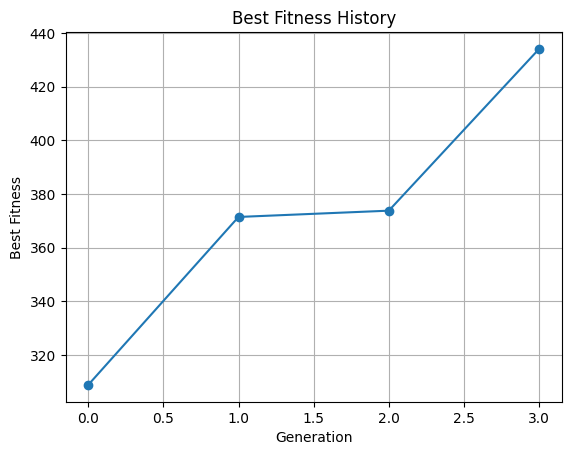

In [ ]:
import matplotlib.pyplot as plt

# Best fitness history data
best_fitness_history = [308.875, 371.47, 373.811, 434.087]

# Plotting
plt.plot(best_fitness_history, marker='o', linestyle='-')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Best Fitness History')
plt.grid(True)
plt.show()


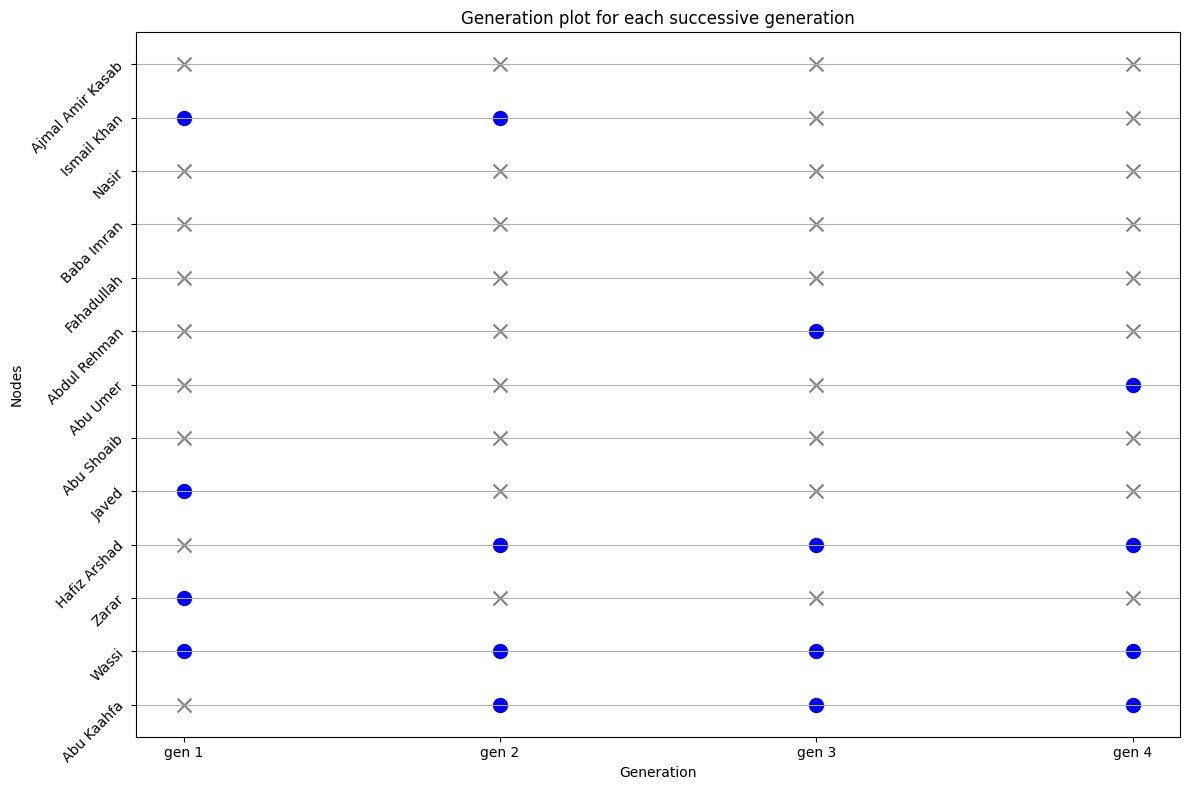

In [ ]:
import matplotlib.pyplot as plt

# Data
generations = ['gen 1', 'gen 2', 'gen 3', 'gen 4']
node_names = [
    "Abu Kaahfa", "Wassi", "Zarar", "Hafiz Arshad", "Javed", "Abu Shoaib", "Abu Umer",
    "Abdul Rehman", "Fahadullah", "Baba Imran", "Nasir", "Ismail Khan", "Ajmal Amir Kasab"
]

available_nodes = [
    ["Wassi", "Ismail Khan", "Javed", "Zarar"],
    ["Wassi", "Ismail Khan", "Hafiz Arshad", "Abu Kaahfa"],
    ["Wassi", "Abdul Rehman", "Hafiz Arshad", "Abu Kaahfa"],
    ["Wassi", "Abu Umer", "Hafiz Arshad", "Abu Kaahfa"]
]

# Plotting
plt.figure(figsize=(12, 8))

for i, generation in enumerate(generations):
    for j, node in enumerate(node_names):
        if node in available_nodes[i]:
            plt.scatter(generation, node, color='blue', marker='o', s=100)
        else:
            plt.scatter(generation, node, color='gray', marker='x', s=100)

plt.title('Generation plot for each successive generation')
plt.xlabel('Generation')
plt.ylabel('Nodes')
plt.xticks(generations)
plt.yticks(node_names, rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


AttributeError: 'Axes' object has no attribute 'tight_layout'

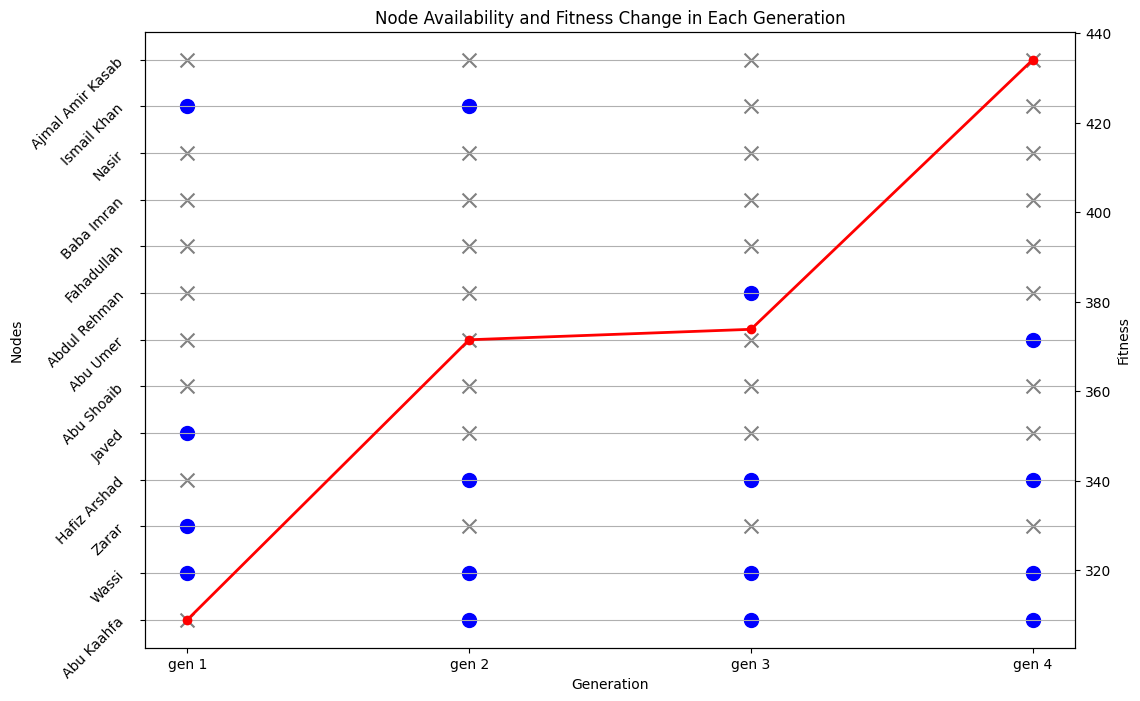

In [ ]:
import matplotlib.pyplot as plt

# Data
generations = ['gen 1', 'gen 2', 'gen 3', 'gen 4']
node_names = [
    "Abu Kaahfa", "Wassi", "Zarar", "Hafiz Arshad", "Javed", "Abu Shoaib", "Abu Umer",
    "Abdul Rehman", "Fahadullah", "Baba Imran", "Nasir", "Ismail Khan", "Ajmal Amir Kasab"
]

available_nodes = [
    ["Wassi", "Ismail Khan", "Javed", "Zarar"],
    ["Wassi", "Ismail Khan", "Hafiz Arshad", "Abu Kaahfa"],
    ["Wassi", "Abdul Rehman", "Hafiz Arshad", "Abu Kaahfa"],
    ["Wassi", "Abu Umer", "Hafiz Arshad", "Abu Kaahfa"]
]

fitness_history_with_every_new_generation = [308.875, 371.47, 373.811, 434.087]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting Node Availability
for i, generation in enumerate(generations):
    for j, node in enumerate(node_names):
        if node in available_nodes[i]:
            ax1.scatter(generation, node, color='blue', marker='o', s=100)
        else:
            ax1.scatter(generation, node, color='gray', marker='x', s=100)

# Adding Fitness Plot
ax2 = ax1.twinx()
ax2.plot(generations, fitness_history_with_every_new_generation, color='red', marker='o', linestyle='-', linewidth=2)

# Setting Labels and Titles
ax1.set_title('Node Availability and Fitness Change in Each Generation')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Nodes')
ax2.set_ylabel('Fitness')
ax1.set_xticks(generations)
ax1.set_yticks(node_names)
ax1.tick_params(axis='y', labelrotation=45, pad=10)
ax1.grid(axis='y')
ax1.tight_layout()
plt.show()
